## Figure 4: Calibration of nonequilibrium switching time required to achieve good precision for nonequilibrium estimates

In [2]:
import numpy as np
import mdtraj as md
import os

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [3]:
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 24
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes\n",
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title\n",
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels\n",
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels\n",
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels\n",
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize\n",
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title"


left: forward neq work distributions as a function of switching for both complex and solvent 
right: stddev of the forward work distribution as a function of switching time and stat error in free enregy corrections

Note: the work distribution of different annealing (0, 500 steps) times for lig0 are saved to `out_old_works.npz` whereas 5000 (production) is saved in the aggregated dictionary.

In [24]:
lig0_works = np.load('out_old_works.npz', allow_pickle=True)['arr_0'].item()


In [52]:
lig0_works_complex = lig0_works['complex']['old']
lig0_works_solvent = lig0_works['solvent']['old']

In [53]:
all_aggregated_works = np.load('aggregation_dictionaries.npz', allow_pickle=True)['arr_0'].item()

In [72]:
lig0_works_complex_5000 = all_aggregated_works[0]['complex'][0]
lig0_works_solvent_5000 = all_aggregated_works[0]['solvent'][0]

I have to pull the BAR computed free energy...

In [105]:
free_energies = np.load(f"ANI2_ligand_dg_corrections.kT.npz", allow_pickle=True)['arr_0'].item()

In [109]:
complex_dg, complex_ddg = free_energies[0]['complex']
solvent_dg, solvent_ddg = free_energies[0]['solvent']

In [74]:
complex_1_step = np.array([val[-1] for val in lig0_works_complex[1]])

In [116]:
def subsample_free_energies(distribution, num_subsamples=100):
    from pymbar.exp import EXP
    dgs, ddgs = [], []
    for i in range(num_subsamples):
        inter_vals = np.random.choice(distribution, 100)
        dg, ddg = EXP(inter_vals)
        dgs.append(dg)
        ddgs.append(ddg)
    
    return np.mean(np.array(dgs)), np.std(np.array(dgs))
        

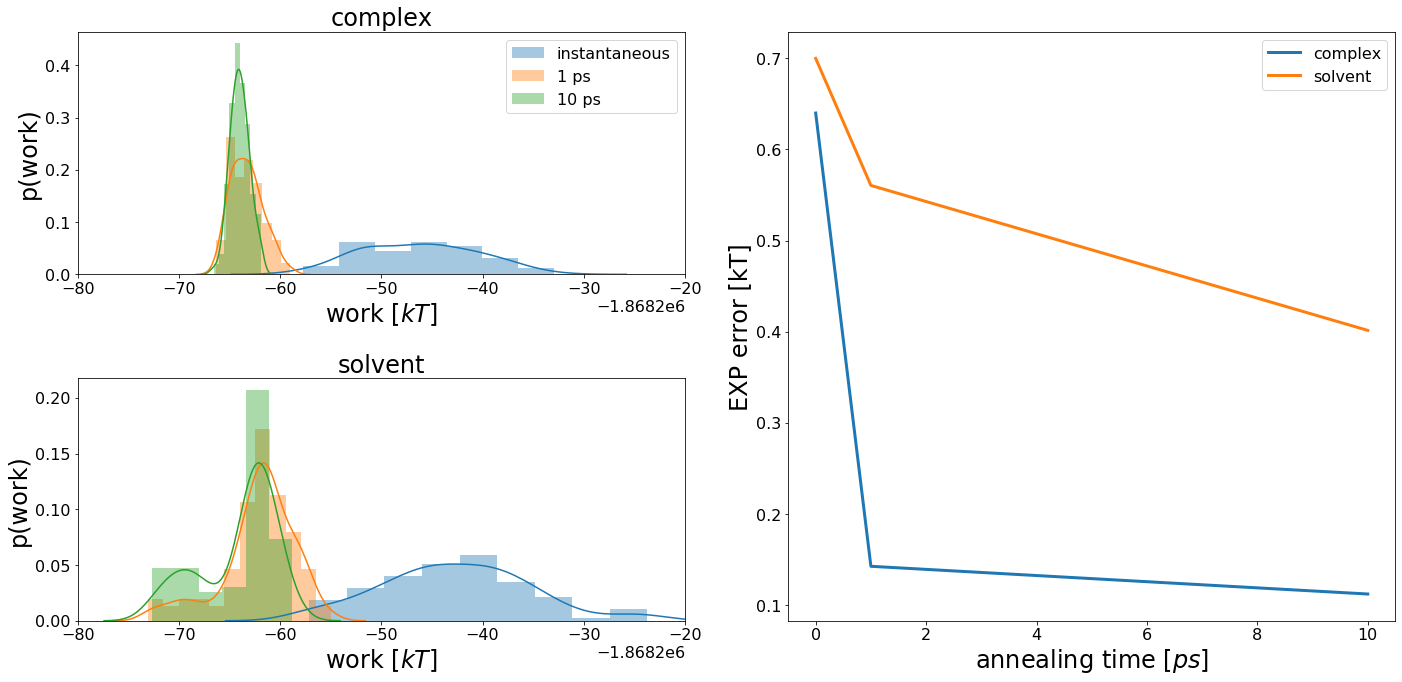

In [163]:
fig = plt.figure(figsize=(20, 10))
ax0 = fig.add_subplot(2, 2, 1)
complex_1_step = np.array([val[-1] for val in lig0_works_complex[1]])
complex_500_step = np.array([val[-1] for val in lig0_works_complex[500]])
sns.distplot(complex_1_step, ax=ax0, label = 'instantaneous')
sns.distplot(complex_500_step, ax=ax0, label = '1 ps')
sns.distplot(lig0_works_complex_5000, ax=ax0, label= '10 ps')
ax0.set_xlabel("work [$kT$]")
ax0.set_ylabel(f"p(work)")
ax0.set_xlim(-80 - 1.8682e6, -20 - 1.8682e6)
ax0.set_title(f"complex")
ax0.legend()

ax1 = fig.add_subplot(2, 2, 3)
solvent_1_step = np.array([val[-1] for val in lig0_works_solvent[1]])
solvent_500_step = np.array([val[-1] for val in lig0_works_solvent[500]])
sns.distplot(solvent_1_step, ax=ax1, label = 'instantaneous')
sns.distplot(solvent_500_step, ax=ax1, label = '1 ps')
sns.distplot(lig0_works_solvent_5000, ax=ax1, label = '10 ps')
ax1.set_xlabel("work [$kT$]")
ax1.set_ylabel(f"p(work)")
ax1.set_xlim(-80 - 1.8682e6, -20 - 1.8682e6)
ax1.set_title(f"solvent")
#ax1.legend()



ax3 = fig.add_subplot(1, 2, 2)
annealing_times = [0, 1, 10]
from pymbar.exp import EXP
complex_EXPs = np.array([subsample_free_energies(i) for i in [complex_1_step, complex_500_step, lig0_works_complex_5000]])
solvent_EXPs = np.array([subsample_free_energies(i) for i in [solvent_1_step, solvent_500_step, lig0_works_solvent_5000]])
ax3.plot(annealing_times, complex_EXPs[:,1], lw = 3, label = f"complex")
ax3.plot(annealing_times, solvent_EXPs[:,1], lw = 3, label = f"solvent")
ax3.set_xlabel(f"annealing time [$ps$]")
ax3.set_ylabel(f"EXP error [kT]")
ax3.legend()



plt.tight_layout()

I am subsampling the EXP errors, so the curve is stochastic